# All Metrics Analysis

### Import Packages

In [60]:
import nltk
import pandas as pd
import numpy as np

import os
from os.path import expanduser
import glob

from scipy import stats
from scipy.stats import pearsonr

import shared_functions as sf
from shared_functions import *

import originality_methods as om
from originality_methods import  *

import flexibility_methods as fm
from flexibility_methods import *

import seaborn as sns
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot

## Read in Data to Analyze

In [2]:
cwd = os.getcwd()

In [3]:
# read in the official novelty results
novelty_dict = {}
for filename in glob.glob(cwd + '/..//results/results_methods/novelty_results/novelty_071921/*.csv'):
    novelty_dict[filename[122:-4]] = pd.read_csv(filename)

In [4]:
# read in the official flexibility results
flexibility_dict = {}
for filename in glob.glob(cwd + '/..//results/results_methods/flexibility_results/flexibility_071921/*.csv'):
    flexibility_dict[filename[157:-4]] = pd.read_csv(filename)

In [5]:
# read in the official originality results
originality_dict = {}
for filename in glob.glob(cwd + '/..//results/results_methods/originality_results/originality_071921/freqs/*.csv'):
    originality_dict[filename[169:-4]] = pd.read_csv(filename)

In [6]:
# read in the official fluency results
fluency_dict = {}
for filename in glob.glob(cwd + '/..//results/results_methods/fluency_results/fluency_071521/*.csv'):
    fluency_dict[filename[145:-4]] = pd.read_csv(filename)

## Comparing Flexibility Results with Human Ratings

In [7]:
# create pvalues matrix
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

### Correlations for Each Prompt
#### Between Human Rater and Method

In [8]:
# calculate corrrelation once
def flexibility_corr(flexibility_dict):
    # list to store list of tuples, later turn into df
    corrs_tuple_list = []
    # get list of keys to iterate through
    flexibility_keys = list(flexibility_dict.keys())
    # calculate the corr coefficient and pval
    for data in flexibility_keys:
        corrs_tuple_list.append(stats.pearsonr(flexibility_dict[data]['flex_m'], flexibility_dict[data]['flex_method']))
        
    # turn list of tuples into df
    result_df = pd.DataFrame(corrs_tuple_list, columns=['corrs', 'pval'])
    
    # rename index with corresponding prompt
    result_df.index = flexibility_keys
    
    # return df
    return result_df

In [9]:
flexibility_corr(flexibility_dict)

,corrs,pval
box,0.397504,0.000115
brick,0.277716,0.008414
chair,0.222167,0.035328
cup,0.168713,0.113996
key,0.421136,0.000036
pencil,0.281232,0.007250
rope,0.336711,0.001175
shoe,0.308043,0.003140


In [10]:
def get_novelty_avg_semdis(collapse_df):
    # get id list
    id_list = sf.get_id_list(collapse_df)
    participant_values = []
    
    for participant in id_list:
        values_list = []
        values_list.append(participant)
        temp_df = collapse_df.loc[collapse_df['id'] == participant]
        values_list.append(temp_df["ewm_vector_cosine_dis"].mean())
        values_list.append(temp_df["ewm_vector_cosine_dis_clus_avg"].mean())
        values_list.append(temp_df["minima_vector_cosine_dis"].mean())
        values_list.append(temp_df["minima_vector_cosine_dis_clus_avg"].mean())
        values_list.append(temp_df["minima_vector_cosine_dis_clus_min"].mean())
        values_list.append(temp_df["SemDis_cbowukwacsubtitle_nf_m"].mean())
        values_list.append(temp_df["SemDis_cbowsubtitle_nf_m"].mean())
        values_list.append(temp_df["SemDis_cbowBNCwikiukwac_nf_m"].mean())
        values_list.append(temp_df["SemDis_TASA_nf_m"].mean())
        values_list.append(temp_df["SemDis_glove_nf_m"].mean())
        values_list.append(temp_df["SemDis_MEAN"].mean())
        values_list.append(temp_df["novelty_1"].mean())
        values_list.append(temp_df["novelty_2"].mean())
        values_list.append(temp_df["novelty_m"].mean())

        values_tuple = tuple(values_list)
        participant_values.append(values_tuple)
        
    participant_avg_novelty_df = pd.DataFrame(participant_values, columns=['id', 'ewm', 'ewm_clust', 'minvec', 'minvec_clust', "minvec_min",
                                                                          'cbowukwacsubtitle', 'cbowsubtitle', 'cbowBNCwikiukwac', 'TASA', 'glove'
                                                                           , "SemDis_MEAN", 'novelty_1', 'novelty_2', 'novelty_m'])
    return participant_avg_novelty_df

In [11]:
def get_novelty_avg(collapse_df):
    # get id list
    id_list = sf.get_id_list(collapse_df)
    participant_values = []
    
    for participant in id_list:
        values_list = []
        values_list.append(participant)
        temp_df = collapse_df.loc[collapse_df['id'] == participant]
        values_list.append(temp_df["ewm_vector_cosine_dis"].mean())
        values_list.append(temp_df["ewm_vector_cosine_dis_clus_avg"].mean())
        values_list.append(temp_df["minima_vector_cosine_dis"].mean())
        values_list.append(temp_df["minima_vector_cosine_dis_clus_avg"].mean())
        values_list.append(temp_df["minima_vector_cosine_dis_clus_min"].mean())
        values_list.append(temp_df["novelty_1"].mean())
        values_list.append(temp_df["novelty_2"].mean())
        values_list.append(temp_df["novelty_m"].mean())
        values_tuple = tuple(values_list)
        participant_values.append(values_tuple)
        
    participant_avg_novelty_df = pd.DataFrame(participant_values, columns=['id', 'ewm', 'ewm_clust', 'minvec'
                                                                           , 'minvec_clust', "minvec_min",
                                                                           "novelty_1", 'novelty_2', 'novelty_m'])
    
    return participant_avg_novelty_df

In [12]:
def get_flexibility_avg(collapse_df):
    # get id list
    id_list = sf.get_id_list(collapse_df)
    participant_values = []
    
    for participant in id_list:
        values_list = []
        values_list.append(participant)
        temp_df = collapse_df.loc[collapse_df['id'] == participant]
        values_list.append(temp_df["flex_1"].mean())
        values_list.append(temp_df["flex_2"].mean())
        values_list.append(temp_df["flex_m"].mean())
        values_list.append(temp_df["flex_method"].mean())
        values_tuple = tuple(values_list)
        participant_values.append(values_tuple)
        
    participant_avg_flexibility_df = pd.DataFrame(participant_values, columns=['id', 'flex_1', 'flex_2', "flex_m", 'flex_method'])
    
    return participant_avg_flexibility_df

In [13]:
def get_originality_avg(collapse_df):
    # get id list
    id_list = sf.get_id_list(collapse_df)
    participant_values = []
    
    for participant in id_list:
        values_list = []
        values_list.append(participant)
        temp_df = collapse_df.loc[collapse_df['id'] == participant]
        values_list.append(temp_df["t_freq"].mean())
        values_tuple = tuple(values_list)
        participant_values.append(values_tuple)
        
    participant_avg_originality_df = pd.DataFrame(participant_values, columns=['id', 'originality'])
    
    return participant_avg_originality_df

In [14]:
def get_fluency_avg(collapse_df):
    # get id list
    id_list = sf.get_id_list(collapse_df)
    participant_values = []
    
    for participant in id_list:
        values_list = []
        values_list.append(participant)
        temp_df = collapse_df.loc[collapse_df['id'] == participant]
        values_list.append(temp_df["fluency"].mean())
        values_tuple = tuple(values_list)
        participant_values.append(values_tuple)
        
    participant_avg_fluency_df = pd.DataFrame(participant_values, columns=['id', 'fluency'])
    
    return participant_avg_fluency_df

## Big Correlation Matrix

In [176]:
def calculate_mega_matrix(novelty_dict_values, flexibility_dict_values, originality_dict_value, fluency_dict_value):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_originality_df = pd.concat(originality_dict_value)
    collapse_fluency_df = pd.concat(fluency_dict_value)
    participant_avg_novelty_df = get_novelty_avg_semdis(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    return (corrs_df, pval_df)

In [177]:
mega_matrix = calculate_mega_matrix(novelty_dict.values(), flexibility_dict.values(), originality_dict.values(), fluency_dict.values())

In [74]:
# mega_matrix[0].to_csv("mega_matrix_corrs_071921.csv")

In [75]:
# mega_matrix[1].to_csv("mega_matrix_pvals_071921.csv")

## Big Heatmap

In [76]:
def get_collapsed_table(novelty_dict_values, flexibility_dict_values, originality_dict_value, fluency_dict_value):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_originality_df = pd.concat(originality_dict_value)
    collapse_fluency_df = pd.concat(fluency_dict_value)
    participant_avg_novelty_df = get_novelty_avg_semdis(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    display(combined_df)
    return combined_df

In [77]:
collapsed_table = get_collapsed_table(novelty_dict.values(), flexibility_dict.values(), originality_dict.values(), fluency_dict.values())

,ewm,ewm_clust,minvec,minvec_clust,minvec_min,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m,flex_1,flex_2,flex_m,flex_method,originality,fluency
0,0.916258,0.901647,0.868873,0.869091,0.654095,0.950625,0.958228,0.950869,0.965343,1.004823,0.965978,2.627907,2.744186,2.686047,3.250000,3.250000,3.250000,3.125000,0.377740,5.375000
1,0.862551,0.914428,0.843163,0.873930,0.634567,0.825773,0.868308,0.876216,0.919684,0.862047,0.870406,2.192308,2.480769,2.336538,2.250000,2.250000,2.250000,2.875000,0.420245,6.500000
2,0.905071,0.892143,0.870615,0.846195,0.684808,0.906865,0.952628,0.948744,0.945728,0.985755,0.947944,2.303030,2.393939,2.348485,1.875000,1.875000,1.875000,2.875000,0.423395,4.125000
3,0.873790,0.902277,0.838416,0.863306,0.646709,0.828138,0.884715,0.892016,0.926774,0.879658,0.882260,2.608696,2.565217,2.586957,2.500000,2.500000,2.500000,3.125000,0.404967,5.750000
4,0.909909,0.906082,0.851334,0.859603,0.649150,0.904187,0.931952,0.917701,0.924515,0.945857,0.924842,2.551724,2.310345,2.431034,2.000000,2.000000,2.000000,2.500000,0.544885,3.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.817126,0.889750,0.798429,0.846484,0.662890,0.758211,0.814478,0.853996,0.873162,0.827565,0.825482,2.058824,2.176471,2.117647,2.375000,2.375000,2.375000,2.500000,0.478145,4.250000
86,0.912743,0.893501,0.860549,0.845253,0.704011,0.920046,0.972731,0.975829,0.962938,1.010314,0.968372,2.023810,2.142857,2.083333,1.875000,1.875000,1.875000,3.625000,0.484650,5.375000
87,0.897082,0.902278,0.841062,0.861676,0.685206,0.896435,0.952157,0.939680,0.958445,0.997124,0.948768,2.321429,2.321429,2.321429,1.750000,1.750000,1.750000,2.875000,0.542983,3.500000
88,0.872219,0.890410,0.839820,0.841838,0.666001,0.871796,0.923463,0.922524,0.936500,0.946687,0.920194,2.378378,2.270270,2.324324,1.625000,1.625000,1.625000,2.750000,0.381521,4.750000


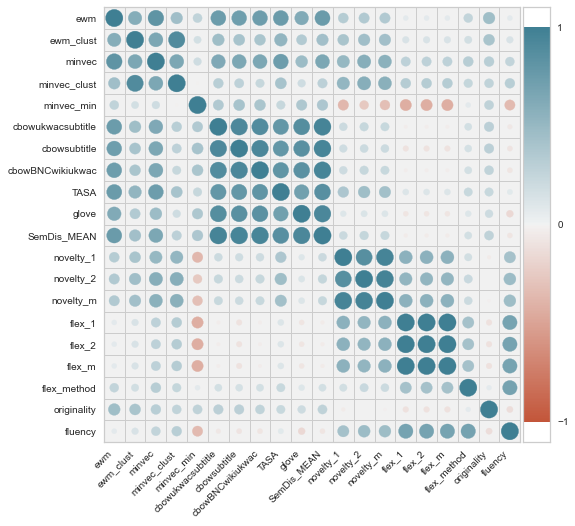

In [78]:
plt.figure(figsize=(8, 8))
corr_matrix = corrplot(collapsed_table.corr(), size_scale=300, marker='o')

<AxesSubplot:>

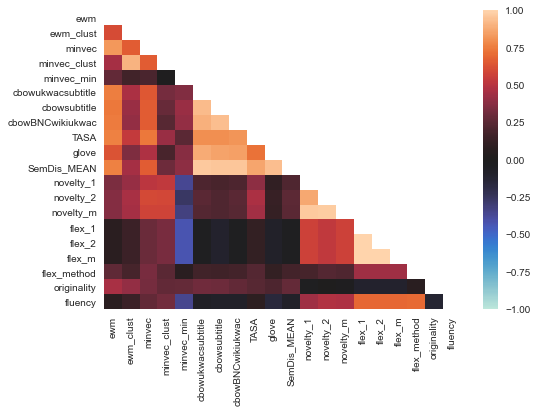

In [79]:
collapsed_table_matrix = np.triu(collapsed_table.corr())
sns.heatmap(collapsed_table.corr(), vmin=-1, vmax=1, center= 0, mask=collapsed_table_matrix)

## Novelty vs Human Ratings Heatmaps

In [80]:
def get_novelty_human_table(novelty_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_novelty_df = participant_avg_novelty_df.drop('id', axis=1)
    display(participant_avg_novelty_df)
    return participant_avg_novelty_df

In [82]:
novelty_human_table = get_novelty_human_table(novelty_dict.values())

,ewm,ewm_clust,minvec,minvec_clust,minvec_min,novelty_1,novelty_2,novelty_m
0,0.916258,0.901647,0.868873,0.869091,0.654095,2.627907,2.744186,2.686047
1,0.862551,0.914428,0.843163,0.873930,0.634567,2.192308,2.480769,2.336538
2,0.905071,0.892143,0.870615,0.846195,0.684808,2.303030,2.393939,2.348485
3,0.873790,0.902277,0.838416,0.863306,0.646709,2.608696,2.565217,2.586957
4,0.909909,0.906082,0.851334,0.859603,0.649150,2.551724,2.310345,2.431034
...,...,...,...,...,...,...,...,...
85,0.817126,0.889750,0.798429,0.846484,0.662890,2.058824,2.176471,2.117647
86,0.912743,0.893501,0.860549,0.845253,0.704011,2.023810,2.142857,2.083333
87,0.897082,0.902278,0.841062,0.861676,0.685206,2.321429,2.321429,2.321429
88,0.872219,0.890410,0.839820,0.841838,0.666001,2.378378,2.270270,2.324324


<AxesSubplot:>

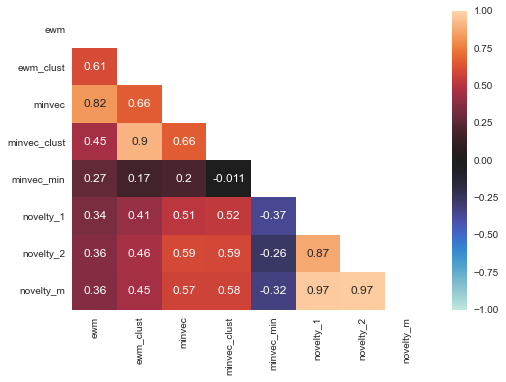

In [84]:
novelty_human_table_matrix = np.triu(novelty_human_table.corr())
sns.heatmap(novelty_human_table.corr(), vmin=-1, vmax=1, center= 0, mask=novelty_human_table_matrix
            , annot = True, fmt='.2g')

## Novelty vs SemDis Heatmaps

In [95]:
def get_novelty_semdis_table(novelty_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    participant_avg_novelty_df = get_novelty_avg_semdis(collapse_novelty_df)
    participant_avg_novelty_df = participant_avg_novelty_df.drop('id', axis=1)
    participant_avg_novelty_df = participant_avg_novelty_df.iloc[:,:-3]
    display(participant_avg_novelty_df)
    return participant_avg_novelty_df

In [96]:
novelty_semdis_table = get_novelty_semdis_table(novelty_dict.values())

,ewm,ewm_clust,minvec,minvec_clust,minvec_min,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN
0,0.916258,0.901647,0.868873,0.869091,0.654095,0.950625,0.958228,0.950869,0.965343,1.004823,0.965978
1,0.862551,0.914428,0.843163,0.873930,0.634567,0.825773,0.868308,0.876216,0.919684,0.862047,0.870406
2,0.905071,0.892143,0.870615,0.846195,0.684808,0.906865,0.952628,0.948744,0.945728,0.985755,0.947944
3,0.873790,0.902277,0.838416,0.863306,0.646709,0.828138,0.884715,0.892016,0.926774,0.879658,0.882260
4,0.909909,0.906082,0.851334,0.859603,0.649150,0.904187,0.931952,0.917701,0.924515,0.945857,0.924842
...,...,...,...,...,...,...,...,...,...,...,...
85,0.817126,0.889750,0.798429,0.846484,0.662890,0.758211,0.814478,0.853996,0.873162,0.827565,0.825482
86,0.912743,0.893501,0.860549,0.845253,0.704011,0.920046,0.972731,0.975829,0.962938,1.010314,0.968372
87,0.897082,0.902278,0.841062,0.861676,0.685206,0.896435,0.952157,0.939680,0.958445,0.997124,0.948768
88,0.872219,0.890410,0.839820,0.841838,0.666001,0.871796,0.923463,0.922524,0.936500,0.946687,0.920194


<AxesSubplot:>

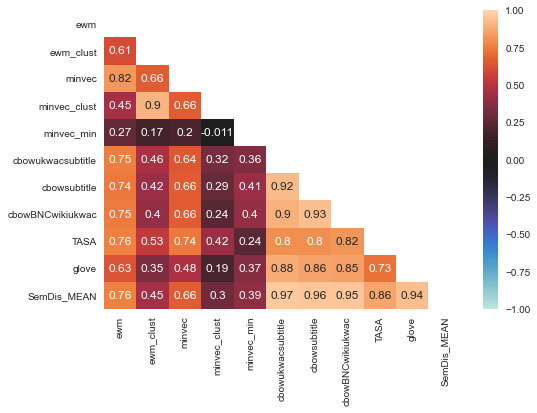

In [108]:
novelty_semdis_table_matrix = np.triu(novelty_semdis_table.corr())
sns.heatmap(novelty_semdis_table.corr(), vmin=-1, vmax=1, center= 0, mask=novelty_semdis_table_matrix, 
            annot = True, fmt='.2g')
#.get_figure().savefig('income_f_age.png') 


## SemDis vs Human Rating Heatmap

In [115]:
def get_semdis_human_table(novelty_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    participant_avg_novelty_df = get_novelty_avg_semdis(collapse_novelty_df)
    participant_avg_novelty_df = participant_avg_novelty_df.drop('id', axis=1)
    participant_avg_novelty_df = participant_avg_novelty_df.iloc[:,5:]
    display(participant_avg_novelty_df)
    return participant_avg_novelty_df

In [116]:
semdis_human_table = get_semdis_human_table(novelty_dict.values())

,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
0,0.950625,0.958228,0.950869,0.965343,1.004823,0.965978,2.627907,2.744186,2.686047
1,0.825773,0.868308,0.876216,0.919684,0.862047,0.870406,2.192308,2.480769,2.336538
2,0.906865,0.952628,0.948744,0.945728,0.985755,0.947944,2.303030,2.393939,2.348485
3,0.828138,0.884715,0.892016,0.926774,0.879658,0.882260,2.608696,2.565217,2.586957
4,0.904187,0.931952,0.917701,0.924515,0.945857,0.924842,2.551724,2.310345,2.431034
...,...,...,...,...,...,...,...,...,...
85,0.758211,0.814478,0.853996,0.873162,0.827565,0.825482,2.058824,2.176471,2.117647
86,0.920046,0.972731,0.975829,0.962938,1.010314,0.968372,2.023810,2.142857,2.083333
87,0.896435,0.952157,0.939680,0.958445,0.997124,0.948768,2.321429,2.321429,2.321429
88,0.871796,0.923463,0.922524,0.936500,0.946687,0.920194,2.378378,2.270270,2.324324


<AxesSubplot:>

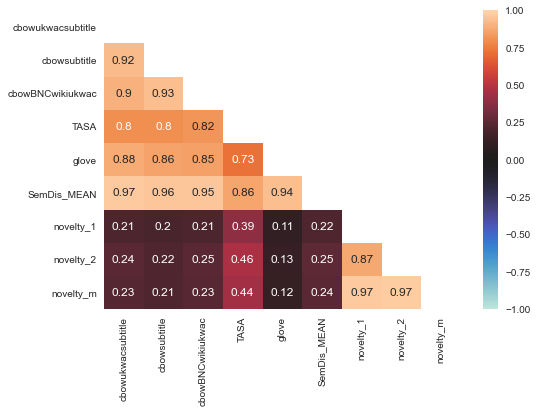

In [117]:
semdis_human_table_matrix = np.triu(semdis_human_table.corr())
sns.heatmap(semdis_human_table.corr(), vmin=-1, vmax=1, center= 0, mask=semdis_human_table_matrix, 
            annot = True, fmt='.2g')

## Flexibility vs Human Ratings Heatmap

In [122]:
def get_flexibility_human_table(flexibility_dict_values):
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_flexibility_df = participant_avg_flexibility_df.drop('id', axis=1)
    display(participant_avg_flexibility_df)
    return participant_avg_flexibility_df

In [123]:
flexibility_human_table = get_flexibility_human_table(flexibility_dict.values())

,flex_1,flex_2,flex_m,flex_method
0,3.250000,3.250000,3.250000,3.125000
1,2.250000,2.250000,2.250000,2.875000
2,1.875000,1.875000,1.875000,2.875000
3,2.500000,2.500000,2.500000,3.125000
4,2.000000,2.000000,2.000000,2.500000
...,...,...,...,...
85,2.375000,2.375000,2.375000,2.500000
86,1.875000,1.875000,1.875000,3.625000
87,1.750000,1.750000,1.750000,2.875000
88,1.625000,1.625000,1.625000,2.750000


<AxesSubplot:>

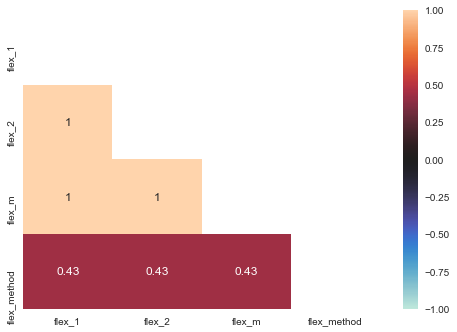

In [124]:
flexibility_human_table_matrix = np.triu(flexibility_human_table.corr())
sns.heatmap(flexibility_human_table.corr(), vmin=-1, vmax=1, center= 0, mask=flexibility_human_table_matrix, annot = True, fmt='.2g')

## Flexibiltiy and Novelty Comparison

In [129]:
def get_novelty_flexibility_table(novelty_dict_values, flexibility_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    return combined_df

In [130]:
novelty_flexibility_table = get_novelty_flexibility_table(novelty_dict.values() ,flexibility_dict.values())

<AxesSubplot:>

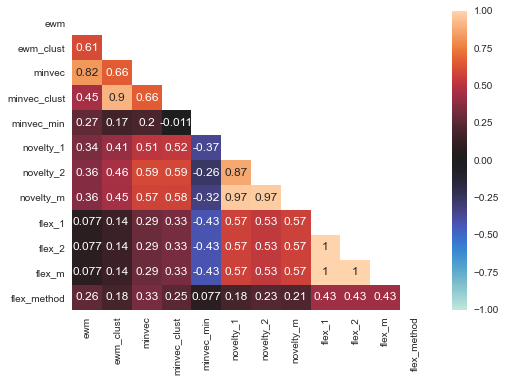

In [131]:
novelty_flexibility_table_matrix = np.triu(novelty_flexibility_table.corr())
sns.heatmap(novelty_flexibility_table.corr(), vmin=-1, vmax=1, center= 0, mask=novelty_flexibility_table_matrix, annot = True, fmt='.2g')

## Originality Comparisons Heatmap

In [132]:
def get_originality_table(novelty_dict_values, flexibility_dict_values, originality_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_originality_df = pd.concat(originality_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    return combined_df

In [133]:
originality_table = get_originality_table(novelty_dict.values() ,flexibility_dict.values(), originality_dict.values())

<AxesSubplot:>

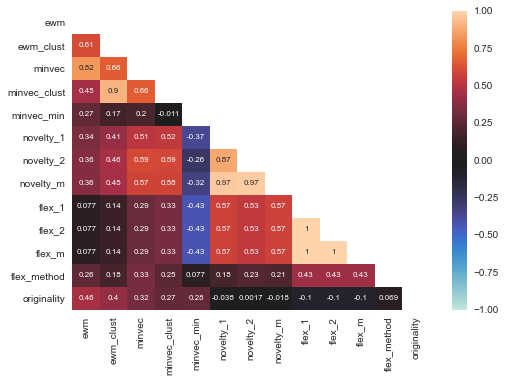

In [143]:
originality_table_matrix = np.triu(originality_table.corr())
sns.heatmap(originality_table.corr(), vmin=-1, vmax=1, center= 0, mask=originality_table_matrix
            , annot = True, fmt='.2g', annot_kws={"fontsize":8})

In [160]:
def get_originality_corrs(novelty_dict_values, flexibility_dict_values, originality_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_originality_df = pd.concat(originality_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:11, 12:])
    pval_df = pd.DataFrame(pval_df.iloc[:11, 12:])
    pval_df.columns = ['originality_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['originality', 'originality_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [161]:
get_originality_corrs(novelty_dict.values() ,flexibility_dict.values(), originality_dict.values())

,originality,originality_pval
metrics,,
ewm,0.459759,0.0
ewm_clust,0.404720,0.0001
minvec,0.324505,0.0018
minvec_clust,0.271635,0.0096
minvec_min,0.280517,0.0074
novelty_1,-0.037868,0.7231
novelty_2,0.001731,0.9871
novelty_m,-0.018426,0.8631
flex_1,-0.101286,0.3422


## Fluency Comparisons Heatmap

In [145]:
def get_fluency_table(novelty_dict_values, flexibility_dict_values, fluency_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_fluency_df = pd.concat(fluency_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    return combined_df

In [146]:
fluency_table = get_fluency_table(novelty_dict.values() ,flexibility_dict.values(), fluency_dict.values())

<AxesSubplot:>

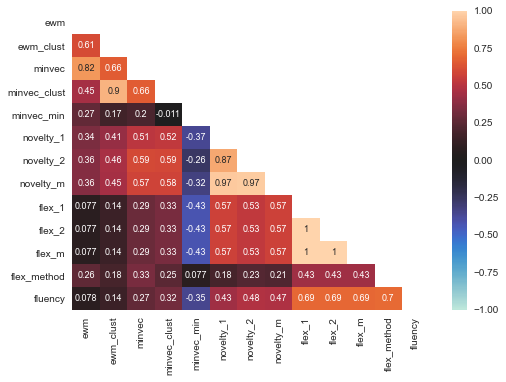

In [148]:
fluency_table_matrix = np.triu(fluency_table.corr())
sns.heatmap(fluency_table.corr(), vmin=-1, vmax=1, center= 0, mask=fluency_table_matrix
            , annot = True, fmt='.2g', annot_kws={"fontsize":9})

In [162]:
def get_fluency_corrs(novelty_dict_values, flexibility_dict_values, fluency_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_fluency_df = pd.concat(fluency_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:11, 12:])
    pval_df = pd.DataFrame(pval_df.iloc[:11, 12:])
    pval_df.columns = ['fluency_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['fluency', 'fluency_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [163]:
get_fluency_corrs(novelty_dict.values() ,flexibility_dict.values(), fluency_dict.values())

,fluency,fluency_pval
metrics,,
ewm,0.077911,0.4654
ewm_clust,0.144164,0.1752
minvec,0.266995,0.011
minvec_clust,0.319929,0.0021
minvec_min,-0.353604,0.0006
novelty_1,0.432215,0.0
novelty_2,0.480047,0.0
novelty_m,0.471494,0.0
flex_1,0.692599,0.0


## Combine Semantic Spaces
## Per Prompt per Individual

In [19]:
novel_dict_box = ['box_banori_results', 'box_cbow_6_ukwac_subtitle_results', 'box_cbow_subtitle_results', 'box_glove_6B_results', 'box_TASA_results']
novel_dict_brick = ['brick_banori_results', 'brick_cbow_6_ukwac_subtitle_results', 'brick_cbow_subtitle_results', 'brick_glove_6B_results', 'brick_TASA_results']
novel_dict_chair = ['chair_banori_results', 'chair_cbow_6_ukwac_subtitle_results', 'chair_cbow_subtitle_results', 'chair_glove_6B_results', 'chair_TASA_results']
novel_dict_cup = ['cup_banori_results', 'cup_cbow_6_ukwac_subtitle_results', 'cup_cbow_subtitle_results', 'cup_glove_6B_results', 'cup_TASA_results']
novel_dict_key = ['key_banori_results', 'key_cbow_6_ukwac_subtitle_results', 'key_cbow_subtitle_results', 'key_glove_6B_results', 'key_TASA_results']
novel_dict_pencil = ['pencil_banori_results', 'pencil_cbow_6_ukwac_subtitle_results', 'pencil_cbow_subtitle_results', 'pencil_glove_6B_results', 'pencil_TASA_results']
novel_dict_rope = ['rope_banori_results', 'rope_cbow_6_ukwac_subtitle_results', 'rope_cbow_subtitle_results', 'rope_glove_6B_results', 'rope_TASA_results']
novel_dict_shoe = ['shoe_banori_results', 'shoe_cbow_6_ukwac_subtitle_results', 'shoe_cbow_subtitle_results', 'shoe_glove_6B_results', 'shoe_TASA_results']

In [20]:
novel_dict_list = [novel_dict_box, novel_dict_brick, novel_dict_chair, novel_dict_cup, novel_dict_key
                  , novel_dict_pencil, novel_dict_rope, novel_dict_shoe]

In [21]:
def collapse_prompt_novelty(prompt_list):
    df_list = []
    for key in prompt_list:
        df_list.append(novelty_dict[key])
        
    return pd.concat(df_list)

In [22]:
def print_per_prompt_results(metric_dict, function):
    key_list = list(metric_dict.keys())
    print(function)
    for i in range(len(key_list)):
        print(key_list[i])
        function(novel_dict_list[i], key_list[i])

## Comparing Flexibility Results with Novelty Results

In [23]:
def calculate_corrs_novelty_flexibility(prompt_list, prompt):
    collapse_novelty_df = collapse_prompt_novelty(prompt_list)
    collapse_flexibility_df = flexibility_dict[prompt]
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:8, 8:])
    pval_df = pd.DataFrame(pval_df.iloc[:8, 8:])
    pval_df.columns = ['flex_1_pval', 'flex_2_pval', 'flex_m_pval', 'flex_method_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['flex_1', 'flex_1_pval','flex_2', 'flex_2_pval', 'flex_m', 'flex_m_pval', 'flex_method', 'flex_method_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [24]:
print_per_prompt_results(flexibility_dict, calculate_corrs_novelty_flexibility)

<function calculate_corrs_novelty_flexibility at 0x000001C651645DC0>
box


,flex_1,flex_1_pval,flex_2,flex_2_pval,flex_m,flex_m_pval,flex_method,flex_method_pval
metrics,,,,,,,,
ewm,0.196274,0.0653,0.196274,0.0653,0.196274,0.0653,0.089172,0.406
ewm_clust,0.097353,0.3641,0.097353,0.3641,0.097353,0.3641,-0.035171,0.7435
minvec,0.065280,0.5433,0.065280,0.5433,0.065280,0.5433,0.200279,0.0599
minvec_clust,0.139266,0.193,0.139266,0.193,0.139266,0.193,0.229530,0.0305
minvec_min,-0.084527,0.4309,-0.084527,0.4309,-0.084527,0.4309,0.059106,0.5822
novelty_1,0.399489,0.0001,0.399489,0.0001,0.399489,0.0001,0.305716,0.0036
novelty_2,0.428859,0.0,0.428859,0.0,0.428859,0.0,0.171730,0.1076
novelty_m,0.455421,0.0,0.455421,0.0,0.455421,0.0,0.259389,0.0141


brick


,flex_1,flex_1_pval,flex_2,flex_2_pval,flex_m,flex_m_pval,flex_method,flex_method_pval
metrics,,,,,,,,
ewm,0.054062,0.6148,0.054062,0.6148,0.054062,0.6148,0.355772,0.0006
ewm_clust,-0.046324,0.6664,-0.046324,0.6664,-0.046324,0.6664,0.258929,0.0143
minvec,0.182371,0.0872,0.182371,0.0872,0.182371,0.0872,0.331286,0.0015
minvec_clust,0.062480,0.5608,0.062480,0.5608,0.062480,0.5608,0.268980,0.0108
minvec_min,-0.380801,0.0002,-0.380801,0.0002,-0.380801,0.0002,0.150023,0.1605
novelty_1,0.354233,0.0007,0.354233,0.0007,0.354233,0.0007,0.142514,0.1828
novelty_2,0.267516,0.0113,0.267516,0.0113,0.267516,0.0113,-0.023866,0.8243
novelty_m,0.344863,0.0009,0.344863,0.0009,0.344863,0.0009,0.064001,0.5513


chair


,flex_1,flex_1_pval,flex_2,flex_2_pval,flex_m,flex_m_pval,flex_method,flex_method_pval
metrics,,,,,,,,
ewm,0.398663,0.0001,0.398663,0.0001,0.398663,0.0001,0.287780,0.006
ewm_clust,0.363117,0.0004,0.363117,0.0004,0.363117,0.0004,0.325390,0.0018
minvec,0.496021,0.0,0.496021,0.0,0.496021,0.0,0.293049,0.0051
minvec_clust,0.416150,0.0,0.416150,0.0,0.416150,0.0,0.271847,0.0095
minvec_min,0.110904,0.298,0.110904,0.298,0.110904,0.298,0.213777,0.0431
novelty_1,0.570458,0.0,0.570458,0.0,0.570458,0.0,0.161494,0.1283
novelty_2,0.468574,0.0,0.468574,0.0,0.468574,0.0,0.266053,0.0113
novelty_m,0.559313,0.0,0.559313,0.0,0.559313,0.0,0.222005,0.0355


cup


,flex_1,flex_1_pval,flex_2,flex_2_pval,flex_m,flex_m_pval,flex_method,flex_method_pval
metrics,,,,,,,,
ewm,0.073853,0.4916,0.073853,0.4916,0.073853,0.4916,0.004736,0.9649
ewm_clust,0.043119,0.6883,0.043119,0.6883,0.043119,0.6883,-0.105909,0.3233
minvec,0.173739,0.1035,0.173739,0.1035,0.173739,0.1035,0.045613,0.6712
minvec_clust,0.078260,0.466,0.078260,0.466,0.078260,0.466,-0.040918,0.7034
minvec_min,-0.309227,0.0032,-0.309227,0.0032,-0.309227,0.0032,0.040117,0.7089
novelty_1,0.547549,0.0,0.547549,0.0,0.547549,0.0,0.075183,0.4838
novelty_2,0.344893,0.0009,0.344893,0.0009,0.344893,0.0009,-0.097752,0.3621
novelty_m,0.494168,0.0,0.494168,0.0,0.494168,0.0,-0.010246,0.9241


key


,flex_1,flex_1_pval,flex_2,flex_2_pval,flex_m,flex_m_pval,flex_method,flex_method_pval
metrics,,,,,,,,
ewm,-0.155503,0.1433,-0.155503,0.1433,-0.155503,0.1433,0.015669,0.8835
ewm_clust,-0.305416,0.0034,-0.305416,0.0034,-0.305416,0.0034,-0.238196,0.0238
minvec,0.251675,0.0167,0.251675,0.0167,0.251675,0.0167,0.249573,0.0177
minvec_clust,0.261474,0.0128,0.261474,0.0128,0.261474,0.0128,0.089546,0.4013
minvec_min,-0.075899,0.4771,-0.075899,0.4771,-0.075899,0.4771,0.353477,0.0006
novelty_1,0.524539,0.0,0.524539,0.0,0.524539,0.0,0.097798,0.3591
novelty_2,0.469030,0.0,0.469030,0.0,0.469030,0.0,0.254872,0.0153
novelty_m,0.525486,0.0,0.525486,0.0,0.525486,0.0,0.189143,0.0742


pencil


,flex_1,flex_1_pval,flex_2,flex_2_pval,flex_m,flex_m_pval,flex_method,flex_method_pval
metrics,,,,,,,,
ewm,0.373547,0.0003,0.373547,0.0003,0.373547,0.0003,0.128012,0.2292
ewm_clust,0.370203,0.0003,0.370203,0.0003,0.370203,0.0003,0.293901,0.0049
minvec,0.404287,0.0001,0.404287,0.0001,0.404287,0.0001,0.091054,0.3934
minvec_clust,0.413553,0.0001,0.413553,0.0001,0.413553,0.0001,0.372617,0.0003
minvec_min,-0.067481,0.5274,-0.067481,0.5274,-0.067481,0.5274,0.141753,0.1826
novelty_1,0.419946,0.0,0.419946,0.0,0.419946,0.0,0.113111,0.2885
novelty_2,0.431016,0.0,0.431016,0.0,0.431016,0.0,0.194563,0.0661
novelty_m,0.444530,0.0,0.444530,0.0,0.444530,0.0,0.159341,0.1336


rope


,flex_1,flex_1_pval,flex_2,flex_2_pval,flex_m,flex_m_pval,flex_method,flex_method_pval
metrics,,,,,,,,
ewm,-0.109186,0.3056,-0.109186,0.3056,-0.109186,0.3056,-0.068825,0.5192
ewm_clust,0.031529,0.768,0.031529,0.768,0.031529,0.768,0.109411,0.3046
minvec,0.133046,0.2113,0.133046,0.2113,0.133046,0.2113,0.034482,0.747
minvec_clust,0.159281,0.1337,0.159281,0.1337,0.159281,0.1337,0.197240,0.0624
minvec_min,-0.185170,0.0806,-0.185170,0.0806,-0.185170,0.0806,0.219454,0.0377
novelty_1,0.242057,0.0215,0.242057,0.0215,0.242057,0.0215,-0.007393,0.9449
novelty_2,0.367630,0.0004,0.367630,0.0004,0.367630,0.0004,-0.104984,0.3247
novelty_m,0.329277,0.0015,0.329277,0.0015,0.329277,0.0015,-0.058887,0.5814


shoe


,flex_1,flex_1_pval,flex_2,flex_2_pval,flex_m,flex_m_pval,flex_method,flex_method_pval
metrics,,,,,,,,
ewm,-0.007673,0.9428,-0.007673,0.9428,-0.007673,0.9428,0.018983,0.859
ewm_clust,-0.172019,0.105,-0.172019,0.105,-0.172019,0.105,0.099337,0.3516
minvec,0.015195,0.887,0.015195,0.887,0.015195,0.887,0.064706,0.5446
minvec_clust,-0.115987,0.2763,-0.115987,0.2763,-0.115987,0.2763,0.069095,0.5176
minvec_min,-0.067786,0.5255,-0.067786,0.5255,-0.067786,0.5255,0.483804,0.0
novelty_1,0.084244,0.4299,0.084244,0.4299,0.084244,0.4299,-0.019454,0.8556
novelty_2,0.137147,0.1974,0.137147,0.1974,0.137147,0.1974,0.039699,0.7103
novelty_m,0.116263,0.2752,0.116263,0.2752,0.116263,0.2752,0.010683,0.9204


ewm:
- 2/8 sig flex_1, flex_2, flex_m, flex_method

ewm_clust:
- 3/8 sig flex_1, flex_2, flex_m
- 4/8 sig flex_method

minvec:
- 3/8 sig flex_1, flex_2, flex_m

minvec_clust:
- 3/8 sig flex_1, flex_m, flex_m
- 4/8 sig flex_method

minvec_min:
- 2/8 sig flex_1, flex_2, flex_m
- 4/8 sig flex_method

novelty_1:
- 7/8 sig flex_1, flex_2, flex_m
- 1/8 sig flex_method

novelty_2:
- 7/8 sig flex_1, flex_2, flex_m
- 3/8 sig flex_method

novelty_3:
- 7/8 sig flex_1, flex_2, flex_m
- 2/8 sig flex_method

## Comparing Originality with Novelty Results

In [25]:
def calculate_corrs_novelty_originality(prompt_list, prompt):
    collapse_novelty_df = collapse_prompt_novelty(prompt_list)
    collapse_originality_df = originality_dict[prompt]
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:8, 8:])
    pval_df = pd.DataFrame(pval_df.iloc[:8, 8:])
    pval_df.columns = ['originality_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['originality', 'originality_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [26]:
print_per_prompt_results(originality_dict, calculate_corrs_novelty_originality)

<function calculate_corrs_novelty_originality at 0x000001C6518E1A60>
box


,originality,originality_pval
metrics,,
ewm,0.189612,0.0751
ewm_clust,-0.000058,0.9996
minvec,-0.000268,0.998
minvec_clust,-0.147569,0.1676
minvec_min,0.530717,0.0
novelty_1,-0.265684,0.0119
novelty_2,-0.322260,0.0021
novelty_m,-0.323983,0.002


brick


,originality,originality_pval
metrics,,
ewm,0.062293,0.562
ewm_clust,0.048276,0.6532
minvec,-0.018245,0.8652
minvec_clust,0.024448,0.8201
minvec_min,0.194064,0.0684
novelty_1,-0.192922,0.0701
novelty_2,-0.018384,0.8642
novelty_m,-0.115453,0.2813


chair


,originality,originality_pval
metrics,,
ewm,0.530989,0.0
ewm_clust,0.469422,0.0
minvec,0.416395,0.0
minvec_clust,0.363885,0.0004
minvec_min,0.290443,0.0055
novelty_1,0.157300,0.1387
novelty_2,0.283312,0.0068
novelty_m,0.227774,0.0308


cup


,originality,originality_pval
metrics,,
ewm,0.161410,0.1308
ewm_clust,0.308080,0.0033
minvec,0.126642,0.237
minvec_clust,0.222841,0.0358
minvec_min,0.189207,0.0758
novelty_1,0.053359,0.6195
novelty_2,0.080514,0.4532
novelty_m,0.073401,0.4942


key


,originality,originality_pval
metrics,,
ewm,-0.105201,0.3237
ewm_clust,-0.270810,0.0098
minvec,0.127268,0.2319
minvec_clust,0.034803,0.7447
minvec_min,0.230110,0.0291
novelty_1,-0.015164,0.8872
novelty_2,0.077023,0.4706
novelty_m,0.034134,0.7494


pencil


,originality,originality_pval
metrics,,
ewm,0.371915,0.0003
ewm_clust,0.532983,0.0
minvec,0.119971,0.26
minvec_clust,0.415412,0.0
minvec_min,0.150080,0.158
novelty_1,0.145888,0.1701
novelty_2,0.166577,0.1166
novelty_m,0.162930,0.1249


rope


,originality,originality_pval
metrics,,
ewm,0.366624,0.0004
ewm_clust,0.316544,0.0024
minvec,0.232547,0.0274
minvec_clust,0.151000,0.1554
minvec_min,0.298730,0.0042
novelty_1,-0.123427,0.2465
novelty_2,0.020861,0.8453
novelty_m,-0.059404,0.5781


shoe


,originality,originality_pval
metrics,,
ewm,0.151010,0.1554
ewm_clust,0.104894,0.3252
minvec,0.141800,0.1825
minvec_clust,0.170178,0.1088
minvec_min,0.172933,0.1031
novelty_1,0.037155,0.7281
novelty_2,-0.042322,0.6921
novelty_m,-0.002787,0.9792


novelty_m and novelt_2:
- 2/8 sig

novelty_1:
- 1/8 sig

ewm:
- 3/8 sig

ewm_clust:
- 5/8 sig

minvec:
- 2/8 sig

minvec_clust:
- 3/8 sig

minvec_min:
- 4/8 sig


## Comparing Originality Results with Flexibility

In [27]:
def calculate_corrs_originality_flexibility(prompt_list, prompt):
    collapse_flexibility_df = flexibility_dict[prompt]
    collapse_originality_df = originality_dict[prompt]
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    combined_df = pd.merge(participant_avg_flexibility_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:4, 4:])
    pval_df = pd.DataFrame(pval_df.iloc[:4, 4:])
    pval_df.columns = ['originality_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['originality', 'originality_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [28]:
print_per_prompt_results(originality_dict, calculate_corrs_originality_flexibility)

<function calculate_corrs_originality_flexibility at 0x000001C6518E18B0>
box


,originality,originality_pval
metrics,,
flex_1,-0.127229,0.2348
flex_2,-0.127229,0.2348
flex_m,-0.127229,0.2348
flex_method,-0.142775,0.182


brick


,originality,originality_pval
metrics,,
flex_1,-0.085636,0.4249
flex_2,-0.085636,0.4249
flex_m,-0.085636,0.4249
flex_method,0.064088,0.5507


chair


,originality,originality_pval
metrics,,
flex_1,0.171388,0.1063
flex_2,0.171388,0.1063
flex_m,0.171388,0.1063
flex_method,0.366536,0.0004


cup


,originality,originality_pval
metrics,,
flex_1,0.002085,0.9845
flex_2,0.002085,0.9845
flex_m,0.002085,0.9845
flex_method,0.074305,0.4889


key


,originality,originality_pval
metrics,,
flex_1,0.148098,0.1636
flex_2,0.148098,0.1636
flex_m,0.148098,0.1636
flex_method,0.334192,0.0013


pencil


,originality,originality_pval
metrics,,
flex_1,0.143285,0.1779
flex_2,0.143285,0.1779
flex_m,0.143285,0.1779
flex_method,0.276725,0.0083


rope


,originality,originality_pval
metrics,,
flex_1,-0.155248,0.144
flex_2,-0.155248,0.144
flex_m,-0.155248,0.144
flex_method,0.052038,0.6262


shoe


,originality,originality_pval
metrics,,
flex_1,-0.008074,0.9398
flex_2,-0.008074,0.9398
flex_m,-0.008074,0.9398
flex_method,0.220326,0.0369


human ratings:
 - never sig
 
flex_method:
 - 4/8 sig

## Comparing Fluency with Novelty Results

In [29]:
def calculate_corrs_novelty_fluency(prompt_list, prompt):
    collapse_novelty_df = collapse_prompt_novelty(prompt_list)
    collapse_fluency_df = fluency_dict[prompt]
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:8, 8:])
    pval_df = pd.DataFrame(pval_df.iloc[:8, 8:])
    pval_df.columns = ['fluency_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['fluency', 'fluency_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [30]:
print_per_prompt_results(fluency_dict, calculate_corrs_novelty_fluency)

<function calculate_corrs_novelty_fluency at 0x000001C65187E700>
box


,fluency,fluency_pval
metrics,,
ewm,0.034228,0.7502
ewm_clust,0.080534,0.4531
minvec,0.110455,0.3028
minvec_clust,0.121902,0.2551
minvec_min,-0.236841,0.0254
novelty_1,0.222566,0.036
novelty_2,0.355715,0.0006
novelty_m,0.320255,0.0022


brick


,fluency,fluency_pval
metrics,,
ewm,0.145437,0.1739
ewm_clust,0.101424,0.3443
minvec,0.263180,0.0127
minvec_clust,0.340491,0.0011
minvec_min,-0.181089,0.0894
novelty_1,0.456836,0.0
novelty_2,0.329723,0.0016
novelty_m,0.436067,0.0


chair


,fluency,fluency_pval
metrics,,
ewm,0.423138,0.0
ewm_clust,0.428000,0.0
minvec,0.525971,0.0
minvec_clust,0.461257,0.0
minvec_min,0.099278,0.3519
novelty_1,0.541904,0.0
novelty_2,0.641109,0.0
novelty_m,0.624853,0.0


cup


,fluency,fluency_pval
metrics,,
ewm,0.021768,0.8395
ewm_clust,0.021530,0.8413
minvec,0.121070,0.2584
minvec_clust,0.124321,0.2457
minvec_min,-0.408381,0.0001
novelty_1,0.299565,0.0043
novelty_2,0.069092,0.52
novelty_m,0.205990,0.0528


key


,fluency,fluency_pval
metrics,,
ewm,-0.038987,0.7152
ewm_clust,-0.209140,0.0479
minvec,0.362068,0.0005
minvec_clust,0.353592,0.0006
minvec_min,-0.032846,0.7586
novelty_1,0.370840,0.0003
novelty_2,0.498649,0.0
novelty_m,0.462477,0.0


pencil


,fluency,fluency_pval
metrics,,
ewm,0.242698,0.0212
ewm_clust,0.311347,0.0028
minvec,0.290443,0.0055
minvec_clust,0.368023,0.0004
minvec_min,-0.216918,0.04
novelty_1,0.310298,0.0029
novelty_2,0.338503,0.0011
novelty_m,0.338570,0.0011


rope


,fluency,fluency_pval
metrics,,
ewm,-0.002943,0.978
ewm_clust,0.217052,0.0399
minvec,0.173132,0.1027
minvec_clust,0.321822,0.002
minvec_min,-0.201661,0.0566
novelty_1,0.254074,0.0157
novelty_2,0.175493,0.098
novelty_m,0.236050,0.0251


shoe


,fluency,fluency_pval
metrics,,
ewm,-0.037727,0.7241
ewm_clust,-0.074997,0.4823
minvec,0.072376,0.4978
minvec_clust,0.100284,0.347
minvec_min,-0.130148,0.2215
novelty_1,0.382508,0.0002
novelty_2,0.448534,0.0
novelty_m,0.436293,0.0


human ratings:
- almost always significant
- if not, barely off

ewm methods:
- most of the time, far from 0.05
- some occasional significance

minvec methods:
minvec:
- 4/8 sig
minvec_clust:
- 5/8 sig
minvec_min:
- 3/8 sig

## Comparing Fluency with Flexibility Results

In [31]:
def calculate_corrs_originality_flexibility(prompt_list, prompt):
    collapse_flexibility_df = flexibility_dict[prompt]
    collapse_fluency_df = fluency_dict[prompt]
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_flexibility_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:4, 4:])
    pval_df = pd.DataFrame(pval_df.iloc[:4, 4:])
    pval_df.columns = ['fluency_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['fluency', 'fluency_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [32]:
print_per_prompt_results(fluency_dict, calculate_corrs_originality_flexibility)

<function calculate_corrs_originality_flexibility at 0x000001C65183B550>
box


,fluency,fluency_pval
metrics,,
flex_1,0.443968,0.0
flex_2,0.443968,0.0
flex_m,0.443968,0.0
flex_method,0.420588,0.0


brick


,fluency,fluency_pval
metrics,,
flex_1,0.470881,0.0
flex_2,0.470881,0.0
flex_m,0.470881,0.0
flex_method,0.674312,0.0


chair


,fluency,fluency_pval
metrics,,
flex_1,0.448515,0.0
flex_2,0.448515,0.0
flex_m,0.448515,0.0
flex_method,0.336102,0.0012


cup


,fluency,fluency_pval
metrics,,
flex_1,0.455313,0.0
flex_2,0.455313,0.0
flex_m,0.455313,0.0
flex_method,0.474879,0.0


key


,fluency,fluency_pval
metrics,,
flex_1,0.696904,0.0
flex_2,0.696904,0.0
flex_m,0.696904,0.0
flex_method,0.524657,0.0


pencil


,fluency,fluency_pval
metrics,,
flex_1,0.429531,0.0
flex_2,0.429531,0.0
flex_m,0.429531,0.0
flex_method,0.614395,0.0


rope


,fluency,fluency_pval
metrics,,
flex_1,0.579038,0.0
flex_2,0.579038,0.0
flex_m,0.579038,0.0
flex_method,0.612169,0.0


shoe


,fluency,fluency_pval
metrics,,
flex_1,0.422699,0.0
flex_2,0.422699,0.0
flex_m,0.422699,0.0
flex_method,0.469671,0.0


always significant

## Comparing Novelty Method with Human Ratings

In [40]:
def calculate_corrs_novelty(prompt_list, prompt):
    collapse_novelty_df = collapse_prompt_novelty(prompt_list)
    participant_avg_novelty_df = get_novelty_avg_semdis(collapse_novelty_df)
    participant_avg_novelty_df = participant_avg_novelty_df.drop('id', axis=1)
    pval_df = calculate_pvalues(participant_avg_novelty_df)
    corrs_df = participant_avg_novelty_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:5, 5:])
    pval_df = pd.DataFrame(pval_df.iloc[:5, 5:])
    display(corrs_df)
    display(pval_df)
#     pval_df.columns = ['novelty_1_pval', "novelty_2_pval", 'novelty_m_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
#     corr_pval_df = corr_pval_df[['novelty_1', "novelty_1_pval", 'novelty_2', 'novelty_2_pval', "novelty_m", 'novelty_m_pval']]
#     corr_pval_df.index.rename('metrics', inplace=True)
#     display(corr_pval_df)

In [41]:
print_per_prompt_results(originality_dict, calculate_corrs_novelty)

<function calculate_corrs_novelty at 0x000001C653EE03A0>
box


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.665800,0.520159,0.581888,0.431309,0.452525,0.627074,0.178069,0.303256,0.266856
ewm_clust,0.329304,0.325408,0.231706,0.384971,0.325586,0.381960,0.138428,0.190230,0.181521
minvec,0.695418,0.530935,0.561575,0.491115,0.470218,0.649967,0.188921,0.325012,0.284985
minvec_clust,0.307457,0.193214,0.198331,0.356193,0.228610,0.299025,0.239525,0.265552,0.277855
minvec_min,0.223638,0.212362,0.159227,0.300294,0.247281,0.274137,-0.174450,-0.249300,-0.234207


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.0,0.0,0.0,0.0,0.0,0.0,0.095,0.0039,0.0115
ewm_clust,0.0016,0.0019,0.0289,0.0002,0.0018,0.0002,0.1958,0.0742,0.0887
minvec,0.0,0.0,0.0,0.0,0.0,0.0,0.0762,0.0019,0.0068
minvec_clust,0.0034,0.0697,0.0624,0.0006,0.0312,0.0044,0.0238,0.0119,0.0084
minvec_min,0.0351,0.0457,0.1361,0.0042,0.0195,0.0093,0.102,0.0185,0.0272


brick


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.608450,0.721327,0.826299,0.741968,0.664228,0.782910,0.175395,-0.098073,0.039717
ewm_clust,0.231240,0.170600,0.274021,0.238061,0.198312,0.247731,0.048370,0.132887,0.101862
minvec,0.543967,0.682834,0.771608,0.732126,0.567605,0.717018,0.365414,0.093329,0.251937
minvec_clust,0.205422,0.183158,0.212535,0.258970,0.152578,0.219687,0.269219,0.393080,0.369965
minvec_min,0.362957,0.271990,0.352641,0.183200,0.377713,0.356750,-0.162385,-0.249111,-0.229982


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.0,0.0,0.0,0.0,0.0,0.0,0.1002,0.3605,0.7117
ewm_clust,0.0292,0.1099,0.0094,0.0247,0.0625,0.0192,0.6526,0.2144,0.3422
minvec,0.0,0.0,0.0,0.0,0.0,0.0,0.0004,0.3843,0.0172
minvec_clust,0.0535,0.0858,0.0455,0.0143,0.1535,0.0386,0.0107,0.0001,0.0004
minvec_min,0.0005,0.0099,0.0007,0.0857,0.0003,0.0006,0.1284,0.0186,0.0301


chair


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.711751,0.799165,0.755741,0.697172,0.646576,0.798133,0.502651,0.616917,0.590208
ewm_clust,0.603111,0.521350,0.565175,0.455607,0.509480,0.590700,0.525099,0.599064,0.594898
minvec,0.673962,0.784809,0.739867,0.718399,0.556421,0.760808,0.606468,0.717628,0.699364
minvec_clust,0.568913,0.505166,0.575743,0.456597,0.475223,0.570901,0.575539,0.628442,0.638600
minvec_min,0.147217,0.262109,0.275738,0.336535,0.281578,0.294000,-0.090953,0.089800,-0.010664


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ewm_clust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
minvec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
minvec_clust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
minvec_min,0.1662,0.0126,0.0085,0.0012,0.0072,0.0049,0.3939,0.4,0.9205


cup


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.738757,0.684514,0.607024,0.723686,0.428299,0.770900,0.135583,0.218249,0.193865
ewm_clust,0.706859,0.578043,0.300931,0.604214,0.446876,0.670188,0.187899,0.333623,0.285441
minvec,0.659359,0.518707,0.399572,0.708735,0.355968,0.650235,0.424929,0.436239,0.474236
minvec_clust,0.660427,0.483678,0.233780,0.551969,0.430465,0.607048,0.291862,0.392729,0.375836
minvec_min,0.296735,0.092932,-0.015223,0.051881,0.355793,0.233776,-0.286825,-0.045550,-0.186140


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.0,0.0,0.0,0.0,0.0,0.0,0.2052,0.0399,0.0687
ewm_clust,0.0,0.0,0.0042,0.0,0.0,0.0,0.0778,0.0014,0.0067
minvec,0.0,0.0,0.0001,0.0,0.0006,0.0,0.0,0.0,0.0
minvec_clust,0.0,0.0,0.0275,0.0,0.0,0.0,0.0055,0.0001,0.0003
minvec_min,0.0047,0.3864,0.8874,0.6292,0.0006,0.0275,0.0064,0.6717,0.0807


key


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.702731,0.741092,0.546887,0.547807,0.457910,0.695530,-0.225064,-0.116155,-0.179135
ewm_clust,0.418062,0.417542,0.462341,0.201946,0.291147,0.417208,-0.121618,-0.103575,-0.119021
minvec,0.303939,0.323123,0.214278,0.169392,-0.116187,0.135901,0.422050,0.499555,0.489338
minvec_clust,-0.041842,-0.028877,-0.027906,-0.142377,-0.234573,-0.153929,0.502604,0.520175,0.542043
minvec_min,0.210185,0.158047,0.121680,0.077455,0.060606,0.139696,-0.093255,0.032789,-0.030161


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.0,0.0,0.0,0.0,0.0,0.0,0.0329,0.2756,0.0912
ewm_clust,0.0,0.0,0.0,0.0563,0.0054,0.0,0.2535,0.3313,0.2639
minvec,0.0036,0.0019,0.0426,0.1105,0.2755,0.2015,0.0,0.0,0.0
minvec_clust,0.6954,0.787,0.794,0.1807,0.0261,0.1475,0.0,0.0,0.0
minvec_min,0.0468,0.1368,0.2533,0.4681,0.5704,0.1891,0.382,0.759,0.7778


pencil


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.775655,0.731078,0.690566,0.672113,0.717463,0.784616,0.590413,0.637952,0.641115
ewm_clust,0.514611,0.547776,0.367844,0.482006,0.417341,0.511801,0.491668,0.555130,0.545941
minvec,0.557382,0.565971,0.593673,0.638144,0.562207,0.633076,0.727145,0.757488,0.775352
minvec_clust,0.431409,0.455989,0.305179,0.534417,0.335486,0.450779,0.526805,0.581994,0.578492
minvec_min,0.014103,0.011932,0.152878,-0.040857,0.113592,0.052178,-0.230517,-0.139571,-0.195039


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ewm_clust,0.0,0.0,0.0004,0.0,0.0,0.0,0.0,0.0,0.0
minvec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
minvec_clust,0.0,0.0,0.0034,0.0,0.0012,0.0,0.0,0.0,0.0
minvec_min,0.895,0.9111,0.1503,0.7022,0.2864,0.6253,0.0288,0.1895,0.0654


rope


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.605288,0.516354,0.579385,0.633640,0.585838,0.616324,0.233456,0.292524,0.285263
ewm_clust,0.182363,0.094535,0.096270,0.317165,0.141992,0.171875,0.239983,0.253600,0.268707
minvec,0.367407,0.400702,0.485559,0.463823,0.376577,0.436489,0.340263,0.310564,0.355467
minvec_clust,0.164869,0.038866,0.073185,0.309512,0.127269,0.146392,0.422946,0.388422,0.443089
minvec_min,0.126861,0.150113,0.165599,0.070414,0.096465,0.129972,-0.366345,-0.394580,-0.414072


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.0,0.0,0.0,0.0,0.0,0.0,0.0268,0.0051,0.0064
ewm_clust,0.0854,0.3755,0.3667,0.0023,0.1819,0.1053,0.0227,0.0159,0.0104
minvec,0.0004,0.0001,0.0,0.0,0.0003,0.0,0.001,0.0029,0.0006
minvec_clust,0.1205,0.7161,0.493,0.003,0.2319,0.1686,0.0,0.0002,0.0
minvec_min,0.2335,0.1579,0.1188,0.5096,0.3657,0.2221,0.0004,0.0001,0.0


shoe


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.790995,0.784962,0.808933,0.785752,0.754969,0.854319,0.117001,-0.038284,0.041173
ewm_clust,0.458275,0.342567,0.354210,0.296669,0.372392,0.409408,0.121840,0.112139,0.122811
minvec,0.507148,0.534022,0.661339,0.605263,0.534912,0.609026,0.180157,-0.042893,0.071841
minvec_clust,0.252642,0.148648,0.231534,0.295582,0.260253,0.263709,0.352379,0.276066,0.329811
minvec_min,0.173603,0.224580,0.111370,0.088251,0.092213,0.150695,-0.214215,-0.238353,-0.237585


,cbowukwacsubtitle,cbowsubtitle,cbowBNCwikiukwac,TASA,glove,SemDis_MEAN,novelty_1,novelty_2,novelty_m
ewm,0.0,0.0,0.0,0.0,0.0,0.0,0.2721,0.7202,0.7
ewm_clust,0.0,0.0009,0.0006,0.0045,0.0003,0.0001,0.2526,0.2927,0.2488
minvec,0.0,0.0,0.0,0.0,0.0,0.0,0.0893,0.6881,0.501
minvec_clust,0.0163,0.162,0.0281,0.0047,0.0132,0.012,0.0007,0.0084,0.0015
minvec_min,0.1018,0.0333,0.296,0.4082,0.3874,0.1563,0.0426,0.0237,0.0241


ewm:
 - 4/8 sig novelty_m and novelty_1
 - 5/8 sig novelty_2
 
ewm_clust:
 - 4/8 sig novelty_m and novelty_2
 - 3/8 sig novelty_1

minvec:
- always significant for novelty_m
- 6/8 sig novelty_1 and novelty_2

minvec_clust:
- always significant for every rater

minvec_min:
- 5/8 sig novelty_m
- 4/8 sig novelty_1 and novelty_2

## Comparing Flexibility Method with Human Ratings

In [35]:
def calculate_corrs_flexibility(prompt_list, prompt):
    collapse_flexibility_df = flexibility_dict[prompt]
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_flexibility_df = participant_avg_flexibility_df.drop('id', axis=1)
    pval_df = calculate_pvalues(participant_avg_flexibility_df)
    corrs_df = participant_avg_flexibility_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:3, 3:])
    pval_df = pd.DataFrame(pval_df.iloc[:3, 3:])
    pval_df.columns = ['flex_method_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [36]:
print_per_prompt_results(originality_dict, calculate_corrs_flexibility)

<function calculate_corrs_flexibility at 0x000001C65183FB80>
box


,flex_method,flex_method_pval
metrics,,
flex_1,0.397504,0.0001
flex_2,0.397504,0.0001
flex_m,0.397504,0.0001


brick


,flex_method,flex_method_pval
metrics,,
flex_1,0.277716,0.0084
flex_2,0.277716,0.0084
flex_m,0.277716,0.0084


chair


,flex_method,flex_method_pval
metrics,,
flex_1,0.222167,0.0353
flex_2,0.222167,0.0353
flex_m,0.222167,0.0353


cup


,flex_method,flex_method_pval
metrics,,
flex_1,0.168713,0.114
flex_2,0.168713,0.114
flex_m,0.168713,0.114


key


,flex_method,flex_method_pval
metrics,,
flex_1,0.421136,0.0
flex_2,0.421136,0.0
flex_m,0.421136,0.0


pencil


,flex_method,flex_method_pval
metrics,,
flex_1,0.281232,0.0073
flex_2,0.281232,0.0073
flex_m,0.281232,0.0073


rope


,flex_method,flex_method_pval
metrics,,
flex_1,0.336711,0.0012
flex_2,0.336711,0.0012
flex_m,0.336711,0.0012


shoe


,flex_method,flex_method_pval
metrics,,
flex_1,0.308043,0.0031
flex_2,0.308043,0.0031
flex_m,0.308043,0.0031


7/8 prompts sig